# Convolutional Neural Networks para Classificação de Imagens 

Utilizando o Conjunto de Dados [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

Iniciamos importando as bibliotecas básicas necessárias

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [14]:
from tensorflow.keras.datasets import cifar10

#### Separamos os dados de Treinamento e Teste

In [15]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data();

#### Obtemos o formato de nossos dados

50.000 imagens de 32x32 pixels com 3 canais de cores (Red, Green, Blue)

In [16]:
x_train.shape

(50000, 32, 32, 3)

Obtemos o formato de uma Matriz que representa uma única imagem

In [17]:
x_train[12].shape

(32, 32, 3)

Apresentamos a imagem com a função **imshow()** da biblioteca Matplotlib

Observe que nesta imagem temos um cavalo.

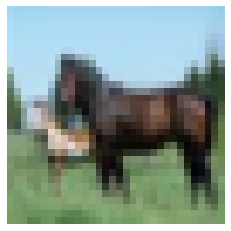

In [19]:
plt.imshow(x_train[12]);
plt.axis('off');

Imprimimos o valor máximo e mínimo encontrados na Matriz

In [20]:
print(x_train[12].max(), x_train[12].min())

251 2


Performamos o Scaling dos Dados para facilitar os cálculos executados pela Rede Neural

In [21]:
x_train = x_train / 255
x_test = x_test / 255

In [22]:
from tensorflow.keras.utils import to_categorical

Transformamos nosso **Target**(y) em Categórico

In [23]:
y_categorical_train = to_categorical(y_train, 10)
y_categorical_test = to_categorical(y_test, 10)

Imprimimos o valor do Target de índice 12, que nos retorna o número 7 que representa um Cavalo

In [24]:
y_train[12]

array([7], dtype=uint8)

### Construindo o Modelo

Neste Modelo em específico vamos utilizar duas técnicas interessantes que podem auxiliar na performance de nossa Rede Neural.

#### Dropout

O *Dropout* é uma das técnicas de regularização mais eficazes e mais comumente usadas para redes neurais, desenvolvida por [Geoffrey Hinton](https://en.wikipedia.org/wiki/Geoffrey_Hinton) e seus alunos na Universidade de Toronto. *Dropout*, aplicada a uma *layer*, consiste em eliminar aleatoriamente
(definir como zero) uma série de *output features* da *layer* durante o treinamento. Digamos dada uma determinada *layer* normalmente ela retornaria um vetor `[0.6, 0.7, 1.5, 0.8, 1.2]` para uma determinada amostra de *input* durante o treinamento. Depois de aplicar o *Dropout*, este vetor terá algumas entradas zero distribuído aleatoriamente: por exemplo, `[0, 0.7, 1.5, 0, 1.2]`. A taxa de *Dropout* é a fração dos recursos que são zerados; geralmente é definido entre **0.2** e **0.5**. Na hora do teste, não unidades são descartadas; em vez disso, os valores de *output* da *layer* são reduzidos por um fator igual à taxa de *Dropout*, para equilibrar o fato de que mais unidades estão ativas do que em tempo de treino.

### Batch Normalization

Normalização é uma ampla categoria de métodos que procuram fazer com que diferentes amostras sejam vistas por um modelo de *Machine Learning* mais semelhante entre si, o que ajuda o modelo a aprender e generalizar bem para novos dados.

A *Batch Normalization* (também conhecida como *batch norm*) é um método usado para tornar as redes neurais artificiais mais rápidas e estáveis por meio da normalização da *input layer*, centralizando e redimensionando. Foi proposto por Sergey Ioffe e Christian Szegedy em 2015.

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [123]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [124]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
dropout_30 (Dropout)         (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
dropout_31 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 32)        

In [125]:
from tensorflow.keras.callbacks import EarlyStopping

In [126]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

#### Treinamos o Modelo

Observe que estamos utilizando **EarlyStopping** para evitar Overfitting.

In [127]:
model.fit(x_train, y_categorical_train, epochs=20, validation_data=(x_test, y_categorical_test), callbacks=[early_stop]);

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4187 - accuracy: 0.4947 - val_loss: 1.3306 - val_accuracy: 0.5338
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0976 - accuracy: 0.6134 - val_loss: 1.1753 - val_accuracy: 0.5975
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9632 - accuracy: 0.6609 - val_loss: 1.1122 - val_accuracy: 0.6153
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8696 - accuracy: 0.6977 - val_loss: 1.1299 - val_accuracy: 0.6056
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7977 - accuracy: 0.7225 - val_loss: 0.9851 - val_accuracy: 0.6598
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7386 - accuracy: 0.7408 - val_loss: 1.0264 - val_accuracy: 0.6321
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6844 - accuracy: 0.7624 - val_loss: 0.9327 - val_accuracy:

#### Observamos o Desempenho do Modelo através de diversas Métricas

In [128]:
metrics = pd.DataFrame(model.history.history)

In [129]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.418733,0.49466,1.330621,0.5338
1,1.097630,0.61342,1.175325,0.5975
2,0.963221,0.66088,1.112192,0.6153
3,0.869553,0.69766,1.129892,0.6056
4,0.797738,0.72246,0.985135,0.6598
5,0.738556,0.74078,1.026398,0.6321
6,0.684428,0.76242,0.932743,0.6733
7,0.634789,0.77796,0.905803,0.6819
8,0.595226,0.78898,0.920621,0.6846
9,0.559491,0.80244,0.906889,0.6848


In [130]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

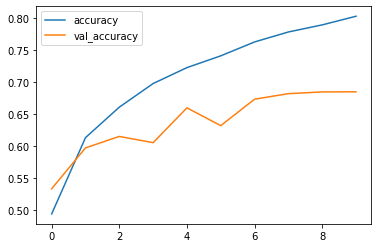

In [131]:
metrics[['accuracy', 'val_accuracy']].plot();

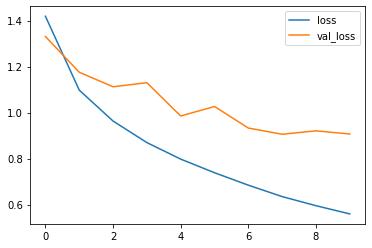

In [132]:
metrics[['loss', 'val_loss']].plot();

In [133]:
model.evaluate(x_test, y_categorical_test, verbose=0)

[0.9068891406059265, 0.6848000288009644]

In [134]:
from sklearn.metrics import classification_report, confusion_matrix

In [135]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [136]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.52      0.64      1000
           1       0.84      0.77      0.80      1000
           2       0.61      0.58      0.59      1000
           3       0.48      0.55      0.51      1000
           4       0.58      0.76      0.66      1000
           5       0.56      0.63      0.59      1000
           6       0.81      0.75      0.78      1000
           7       0.82      0.65      0.73      1000
           8       0.70      0.85      0.77      1000
           9       0.81      0.79      0.80      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.69     10000
weighted avg       0.70      0.68      0.69     10000



In [137]:
confusion_matrix(y_test, predictions)

array([[516,  21,  76,  47,  62,  14,  14,  15, 200,  35],
       [ 10, 770,  14,  21,  16,  14,  18,   4,  52,  81],
       [ 37,   5, 577,  87, 118,  83,  56,  19,  14,   4],
       [  9,   5,  60, 548,  78, 215,  30,  27,  18,  10],
       [  7,   2,  53,  64, 764,  34,  28,  33,  14,   1],
       [  3,   2,  47, 195,  66, 633,  11,  28,   8,   7],
       [  1,   1,  50,  79,  68,  41, 749,   6,   2,   3],
       [  8,   1,  37,  76, 112,  81,   9, 653,   4,  19],
       [ 13,  41,  25,  18,  17,   9,   7,   3, 846,  21],
       [ 14,  73,  10,  18,  12,  15,   7,  10,  49, 792]])

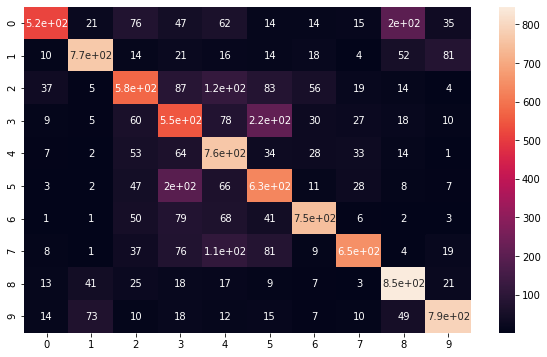

In [138]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True);

#### Testamos o Modelo e sua capacidade Preditiva

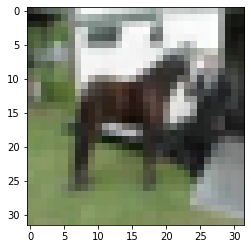

In [139]:
image = x_test[20]
plt.imshow(image);

In [140]:
np.argmax(model.predict(image.reshape(1,32,32,3)), axis=-1)[0]

7

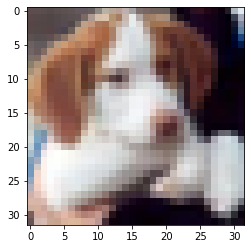

In [141]:
img = x_test[16]
plt.imshow(img);

In [142]:
np.argmax(model.predict(img.reshape(1,32,32,3)), axis=-1)[0]

5